In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn

In [223]:
data = pd.read_csv('noOutliers.csv')


In [226]:
X=data.iloc[:,:-1]
y= data.iloc[:,-1]

In [227]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [228]:
# Creating a random forest model

from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
randomForest = RandomForestRegressor(n_estimators = 100, random_state=0)
randomForest.fit(X_train,y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [233]:
rand_pred = randomForest.predict(X_test)
rand = sum((y_test - rand_pred)**2)
rsmle(rand_pred,y_test)

NameError: name 'rsmle' is not defined

In [ ]:
variance importance plot


In [234]:
import numpy as np

def rmsle(h, y):
   """
   Compute the Root Mean Squared Log Error for hypthesis h and targets y
   
   Args:
       h - numpy array containing predictions with shape (n_samples, n_targets)
       y - numpy array containing targets with shape (n_samples, n_targets)
   """
   return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())

In [235]:
rmsle(rand_pred,y_test)

0.1630672585619909

In [133]:
import sklearn.feature_selection as fs
best60 = fs.SelectKBest(fs.f_regression, k=60).fit_transform(X_train, y_train)
best60.shape

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


(1152, 60)

In [96]:
names = [i for i in list(X)]
names

['MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RM',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_Saw

In [211]:
# Creating a multilinear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [214]:
y_pred = regressor.predict(X_test)
rss1 = sum((y_pred - y_test)**2)
rss1
(191900000000- rss1)/

10057347366.455322

In [112]:
print("Coefficients: \n", regressor.coef_)
print("Mean Squared Error: %.2f" % np.mean((y_test-y_pred)**2))
print('Variance Score: %.2f' % regressor.score(X_test, y_test))

Coefficients: 
 [ 3.13589007e+03  5.64822221e+03 -2.59731114e+03 -8.40279830e+03
  1.99749419e+03  3.87667962e+03  2.15241633e+04 -1.86619890e+04
 -1.30415012e+04 -6.14698070e+03 -7.90840718e+03 -1.82387587e+04
 -2.00716800e+04 -1.89096294e+04 -1.32286708e+04  9.59494053e+02
  6.16435098e+02 -2.06244159e+03 -1.37911762e+03  5.28385091e+03
 -2.41130896e+03  6.93861992e+02 -3.80520620e+03 -1.23216138e+04
 -1.94730981e+01  6.59042111e+03 -2.87227381e+03 -1.44554553e+04
  1.44594589e+04  5.00878622e+04  2.28180683e+04  1.67075240e+04
  2.14993647e+03  2.57175251e+04 -7.82436677e+02 -1.32471598e+03
  1.87502461e+03  1.45743767e+04  2.17220721e+03  8.36655754e+02
  2.68668253e+04 -2.08810103e+03  2.76714886e+04  3.94797246e+04
  1.08207632e+03  2.71049830e+03  9.70135728e+03  1.00748071e+04
  1.81309562e+04  5.74091938e+04  1.17211168e+03  1.58601330e+04
 -9.24049855e+03 -6.78810425e+03 -7.00621525e+03  5.60893827e+02
 -3.71995786e+04 -4.29579279e+03 -2.08127133e+04 -1.65978316e+03
  3.54702

In [115]:
coefficients = regressor.coef_.tolist()
# pd.DataFrame(zip(names,coefficients), columns = ['names','coefficients'])

----------------------- CREAT A correlation plot -----------------------


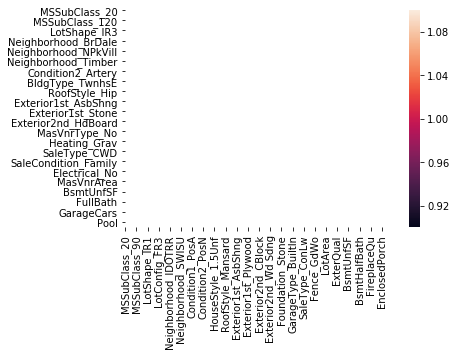

Top Absolute Correlations
Exterior1st_CBlock   Exterior2nd_CBlock       1.000000
MSSubClass_90        BldgType_Duplex          1.000000
Pool                 PoolQC                   0.990000
SaleType_New         SaleCondition_Partial    0.989206
MSSubClass_190       BldgType_2fmCon          0.977586
Exterior1st_CemntBd  Exterior2nd_CmentBd      0.975842
MSSubClass_80        HouseStyle_SLvl          0.969404
Exterior1st_MetalSd  Exterior2nd_MetalSd      0.969315
GarageQual           GarageCond               0.957747
MSSubClass_45        HouseStyle_1.5Unf        0.948268
MSSubClass_50        HouseStyle_1.5Fin        0.947352
GarageType_No        GarageCond               0.940842
                     GarageQual               0.936817
Exterior1st_AsbShng  Exterior2nd_AsbShng      0.911666
Exterior1st_HdBoard  Exterior2nd_HdBoard      0.882494
GarageCars           GarageArea               0.876530
Fireplaces           FireplaceQu              0.867345
RoofStyle_Flat       RoofMatl_Tar&Grv  

<bound method DataFrame.corr of       MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
482               0              0              0              0   
1050              0              0              0              0   
670               0              0              0              0   
1239              1              0              0              0   
530               0              0              0              0   
1010              1              0              0              0   
353               0              0              0              0   
1440              1              0              0              0   
1086              1              0              0              0   
1368              0              0              0              0   
390               1              0              0              0   
826               0              0              0              0   
312               0              0              0              0   
438             

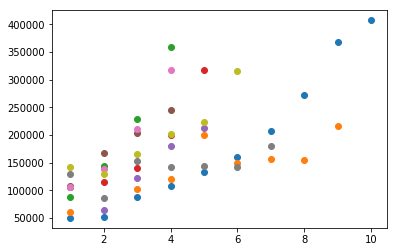

In [140]:
# test_overallqual = data.groupby('OverallQual').mean()
# plt.scatter(x= test_overallqual.index, y = test_overallqual['SalePrice']) # look at a polynomial regression 

test_overallcond = data.groupby('OverallCond').mean()
plt.scatter(x= test_overallcond.index, y = test_overallcond['SalePrice'])

# test_exterqual = data.groupby('ExterQual').mean()
# plt.scatter(x= test_exterqual.index, y = test_exterqual['SalePrice']) # look at a polynomial regression

# test_bsmtqual = data.groupby('BsmtQual').mean()
# plt.scatter(x = test_bsmtqual.index, y = test_bsmtqual['SalePrice']) # look at a polynomial regression

test_bsmtcond = data.groupby('BsmtCond').mean()
plt.scatter(x = test_bsmtcond.index, y = test_bsmtcond['SalePrice'])

# test_bsmtexposure = data.groupby('BsmtExposure').mean()
# plt.scatter(x = test_bsmtexposure.index, y = test_bsmtexposure['SalePrice']) # linear regression

# test_kitchenqual = data.groupby('KitchenQual').mean()
# plt.scatter(x = test_kitchenqual.index, y = test_kitchenqual['SalePrice']) # polynomial regression

test_functional = data.groupby('Functional').mean()
plt.scatter(x = test_functional.index, y = test_functional['SalePrice'])

 # look at a polynomial regression

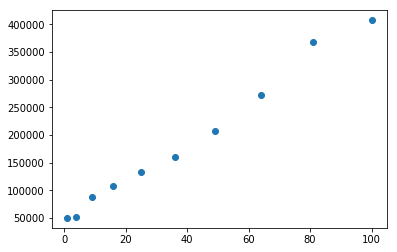

In [155]:
test_overallqual = data.groupby('OverallQual').mean()
# plt.scatter(x= [i**2 for i in test_overallqual.index], y = test_overallqual['SalePrice'])?
data['OverallQual'] = [i**2 for i in data.OverallQual]

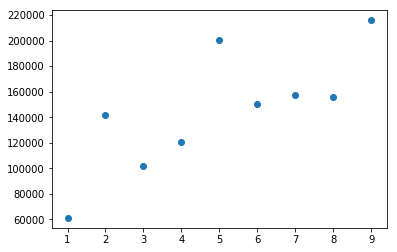

In [222]:
import math
test_overallcond = data.groupby('OverallCond').mean()
plt.scatter(x= [i for i in test_overallcond.index], y = test_overallcond['SalePrice'])

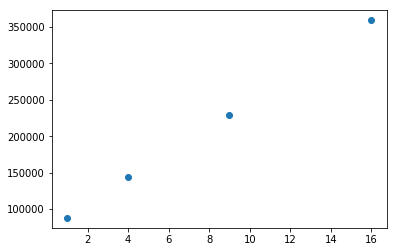

In [171]:
test_exterqual = data.groupby('ExterQual').mean()
plt.scatter(x=[i**2 for i in test_exterqual.index], y = test_exterqual['SalePrice'])

data.ExterQual = [i**2 for i in data.ExterQual]

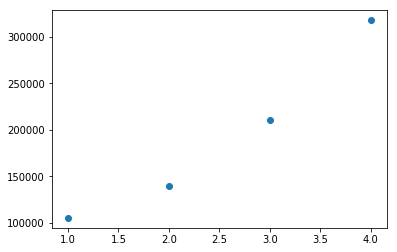

In [144]:
test_kitchenqual = data.groupby('KitchenQual').mean()
# plt.scatter(x = test_kitchenqual.index, y = test_kitchenqual['SalePrice'])

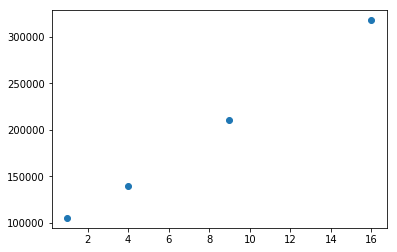

In [145]:
test_kitchenqual = data.groupby('KitchenQual').mean()
plt.scatter(x = [i**2 for i in test_kitchenqual.index], y = test_kitchenqual['SalePrice'])

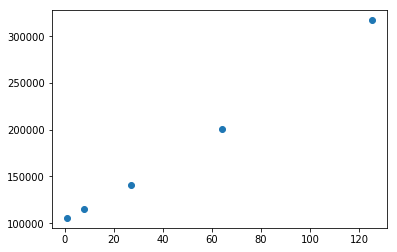

In [177]:
test_bsmtqual = data.groupby('BsmtQual').mean()
plt.scatter(x = [i**3 for i in test_bsmtqual.index], y = test_bsmtqual['SalePrice'])

data.BsmtQual = [i**3 for i in data.BsmtQual]

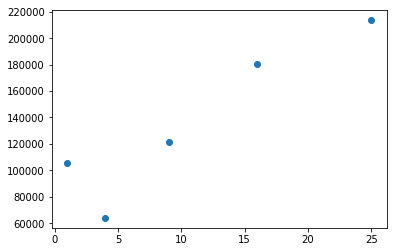

In [220]:
test_bsmtcond = data.groupby('BsmtCond').mean()
plt.scatter(x = [i**2 for i in test_bsmtcond.index], y = test_bsmtcond['SalePrice'])



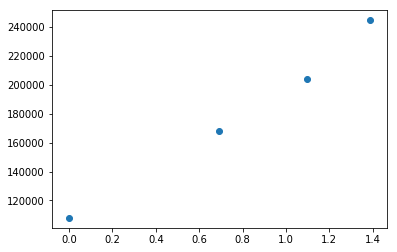

In [190]:
test_bsmtexposure = data.groupby('BsmtExposure').mean()
plt.scatter(x = [np.log(i) for i in test_bsmtexposure.index], y = test_bsmtexposure['SalePrice']) # linear regression

data.BsmtExposure = [np.log(i) for i in data['BsmtExposure']]

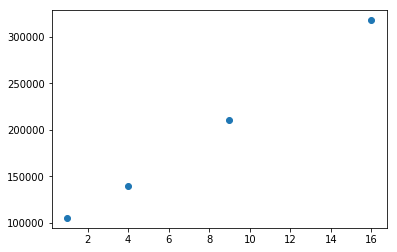

In [193]:
test_kitchenqual = data.groupby('KitchenQual').mean()
plt.scatter(x = [i**2 for i in test_kitchenqual.index], y = test_kitchenqual['SalePrice'])

data.KitchenQual = [i**2 for i in data.KitchenQual]

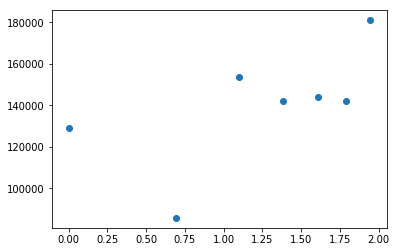

In [195]:
test_functional = data.groupby('Functional').mean()
plt.scatter(x =[np.log(i) for i in test_functional.index], y = test_functional['SalePrice'])

In [224]:
data.KitchenQual = [i**2 for i in data.KitchenQual]
data.BsmtExposure = [np.log(i) for i in data['BsmtExposure']]
data.BsmtQual = [i**3 for i in data.BsmtQual]
data.ExterQual = [i**2 for i in data.ExterQual]
data['OverallQual'] = [i**2 for i in data.OverallQual]

In [225]:
data.to_csv('ordinalTrans.csv')